In [7]:
data_dir = "/scr/shared/clam/datasets/metaworld/assembly-v2/buffer_assembly-v2.pt"

import numpy as np

# load with tensordict
import torch

data = torch.load(data_dir)

print(data)

episode_data = data["episode"].cpu().numpy()
episode_ind = np.where(episode_data[:-1] != episode_data[1:])[0]
print(episode_ind)

/tmp/ipykernel_2015540/4215135369.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_dir)


TensorDict(
    fields={
        action: Tensor(shape=torch.Size([100899, 4]), device=cuda:0, dtype=torch.float32, is_shared=True),
        episode: Tensor(shape=torch.Size([100899]), device=cuda:0, dtype=torch.int64, is_shared=True),
        image: Tensor(shape=torch.Size([100899, 84, 84, 3]), device=cuda:0, dtype=torch.uint8, is_shared=True),
        obs: Tensor(shape=torch.Size([100899, 39]), device=cuda:0, dtype=torch.float32, is_shared=True),
        reward: Tensor(shape=torch.Size([100899]), device=cuda:0, dtype=torch.float32, is_shared=True)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)
[   100    201    302    403    504    605    706    807    908   1009
   1110   1211   1312   1413   1514   1615   1716   1817   1918   2019
   2120   2221   2322   2423   2524   2625   2726   2827   2928   3029
   3130   3231   3332   3433   3534   3635   3736   3837   3938   4039
   4140   4241   4342   4443   4544   4645   4746   4847   4948   5049
   5150   5251   53

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (84, 84) to (96, 96) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[        nan  0.87853926  0.8820177  ... 20.         20.
 20.        ]
0 100
[0.87853926 0.8820177  0.88222814 0.88394207 0.8863422  0.8827544
 0.8745089  0.8660875  0.8580874  0.85107476 0.8472094  0.84479845
 0.84248817 0.84321535 0.8454941  0.8495137  0.85324323 0.8547897
 0.85277766 0.8490429  0.846494   0.8423704  0.8352184  0.82681423
 0.81988484 0.8157271  0.8131132  0.811061   0.81020546 0.8095855
 0.8080398  0.80611396 0.80476695 0.8043115  0.8038076  0.8032433
 0.8033506  0.80394787 0.8043728  0.8044463  0.80465347 0.8055006
 0.80641377 0.80628294 0.8057687  0.8062465  0.80737907 0.80842936
 0.8080215  0.8062748  0.80450654 0.80316454 0.80276054 0.8028513
 0.80321425 0.804233   0.80517274 0.8057521  0.8062852  0.8061005
 0.8051916  0.8043648  0.8038093  0.8037686  0.80390567 0.80379266
 0.80341697 0.80265385 0.8014776  0.8002052  0.7991928  0.7989124
 0.79904896 0.7991033  0.7990606  0.79941213 0.79988277 0.80045784
 0.80104554 0.8015934  0.8018103  0.8019867  0.8019043  0.80

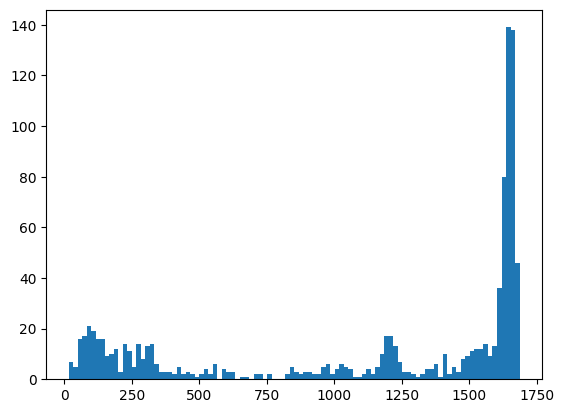

In [33]:
episode_data = data["episode"].cpu().numpy()
episode_ind = np.where(episode_data[:-1] != episode_data[1:])[0]
# print(episode_ind)

obs = data["image"].cpu().numpy()
first_ep = obs[: episode_ind[0]]

# make video and render as imageio
import imageio

imageio.mimsave("test.mp4", first_ep, fps=30)

trajs_rews = data["reward"].cpu().numpy()
print(trajs_rews)
trajs_rets = []
start = 0
for i in range(len(episode_ind)):
    print(start, episode_ind[i])
    if i == 0:
        ret = trajs_rews[start + 1 : episode_ind[i]]
    else:
        ret = trajs_rews[start + 2 : episode_ind[i]]
    print(ret)
    trajs_rets.append(ret)
    start = episode_ind[i]

# print(len(trajs_rets))
trajs_rets = np.array(trajs_rets)
trajs_rets = np.sum(trajs_rets, axis=1)


# make histogram of trajs_rets
import matplotlib.pyplot as plt

plt.hist(trajs_rets, bins=100)
plt.show()

In [34]:
trajs_rews = data["reward"].cpu().numpy()
trajs_rews[:200]

array([       nan, 0.87853926, 0.8820177 , 0.88222814, 0.88394207,
       0.8863422 , 0.8827544 , 0.8745089 , 0.8660875 , 0.8580874 ,
       0.85107476, 0.8472094 , 0.84479845, 0.84248817, 0.84321535,
       0.8454941 , 0.8495137 , 0.85324323, 0.8547897 , 0.85277766,
       0.8490429 , 0.846494  , 0.8423704 , 0.8352184 , 0.82681423,
       0.81988484, 0.8157271 , 0.8131132 , 0.811061  , 0.81020546,
       0.8095855 , 0.8080398 , 0.80611396, 0.80476695, 0.8043115 ,
       0.8038076 , 0.8032433 , 0.8033506 , 0.80394787, 0.8043728 ,
       0.8044463 , 0.80465347, 0.8055006 , 0.80641377, 0.80628294,
       0.8057687 , 0.8062465 , 0.80737907, 0.80842936, 0.8080215 ,
       0.8062748 , 0.80450654, 0.80316454, 0.80276054, 0.8028513 ,
       0.80321425, 0.804233  , 0.80517274, 0.8057521 , 0.8062852 ,
       0.8061005 , 0.8051916 , 0.8043648 , 0.8038093 , 0.8037686 ,
       0.80390567, 0.80379266, 0.80341697, 0.80265385, 0.8014776 ,
       0.8002052 , 0.7991928 , 0.7989124 , 0.79904896, 0.79910